In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, GlobalAveragePooling2D, Dropout, MaxPool2D, BatchNormalization, Flatten, Activation
from tensorflow.keras.utils import to_categorical
import os

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [38]:
x = df.drop('label', axis = 'columns')
y = df.label

In [39]:
x = x.to_numpy()
y = y.to_numpy()

In [40]:
x = (x/255.)

In [41]:
x = x.reshape((-1, 28, 28, 1))

In [42]:
y

array([2, 9, 6, ..., 8, 8, 7])

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size = 0.1, random_state = 10)

In [11]:
pd.DataFrame(y_cv).value_counts()

2    635
4    614
3    613
1    611
0    600
5    599
8    588
6    584
7    578
9    578
dtype: int64

In [44]:
y_train = to_categorical(y_train)

In [45]:
y_cv = to_categorical(y_cv)

In [46]:
np.save('x_train',x_train)
np.save('y_train',y_train)
np.save('x_cv',x_cv)
np.save('y_cv',y_cv)

In [15]:
x_train.shape

(54000, 28, 28, 1)

In [3]:
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_cv = np.load('x_cv.npy')
y_cv = np.load('y_cv.npy')

In [3]:
pd.DataFrame(x_train.reshape((-1, 784))).describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,...,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000,54000.000000
mean,0.000004,0.000025,0.000137,0.000383,0.000929,0.001558,0.003087,0.008542,0.022192,0.056592,...,0.135935,0.091667,0.065145,0.070111,0.089237,0.070014,0.033269,0.010836,0.003357,0.000279
std,0.000391,0.001101,0.004834,0.009142,0.016074,0.022050,0.031581,0.054708,0.093174,0.149976,...,0.225738,0.191822,0.164750,0.172395,0.202957,0.176823,0.115695,0.068256,0.036535,0.008526
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.227451,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.062745,0.141176,0.886275,0.643137,0.890196,0.901961,0.878431,0.882353,0.996078,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667


### Data Augmentation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_gen = ImageDataGenerator(rotation_range = 10, zoom_range = 0.3, shear_range = 0.3, horizontal_flip = True, vertical_flip = True)

In [5]:
train_batches = train_gen.flow(x_train, y_train, batch_size = 16)

### Model

In [9]:
model = Sequential([
    Conv2D(128, (3, 3), padding = 'same',input_shape = (28, 28, 1)),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    MaxPool2D((2,2)),
    
    Conv2D(256, (3, 3), padding = 'same'),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.3),
    MaxPool2D((2,2)),
    
    Flatten(),
    
    Dropout(0.2),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(512, activation = 'relu'),
    Dropout(0.2),
    Dense(10, activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 128)       512       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
batch_normalization_3 (Batch (None, 14, 14, 256)      

In [39]:
model2.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(0.001),
              metrics = ['accuracy'])

In [7]:
cb = tf.keras.callbacks.ModelCheckpoint(filepath = 'model.ckpt', save_weigths_only = True, verbose = 1)

In [18]:
model.load_weights('model.ckpt')

In [17]:
model.fit(x_train, y_train, epochs = 50, callbacks = [cb], validation_data = (x_cv, y_cv), batch_size = 16)

Epoch 1/50
3375/3375 [==============================] - 20s 6ms/step - loss: 0.0876 - accuracy: 0.9687 - val_loss: 0.1978 - val_accuracy: 0.9315

Epoch 00001: saving model to model.ckpt
INFO:tensorflow:Assets written to: model.ckpt/assets


INFO:tensorflow:Assets written to: model.ckpt/assets


Epoch 2/50
1081/3375 [========>.....................] - ETA: 13s - loss: 0.0915 - accuracy: 0.9664

KeyboardInterrupt: 

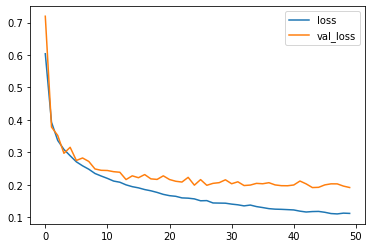

In [98]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['loss', 'val_loss'])


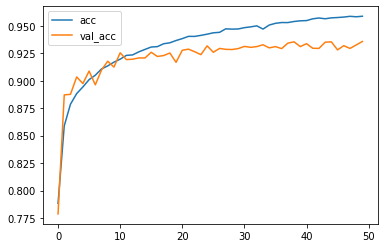

In [99]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])

In [41]:
model.save('model.h5')

In [19]:
from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv('fashion-mnist_test.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [26]:
x = df.drop('label', axis = 'columns')
y = df.label

In [27]:
x = x.to_numpy()
y_test = y.to_numpy()

In [28]:
x = x/255.

In [29]:
x_test = x.reshape((-1, 28, 28, 1))

In [30]:
pred = np.argmax(model.predict(x_test), axis = 1)

In [31]:
pred

array([0, 1, 2, ..., 8, 8, 1])

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1000
           1       0.99      0.99      0.99      1000
           2       0.91      0.91      0.91      1000
           3       0.94      0.95      0.94      1000
           4       0.93      0.87      0.90      1000
           5       1.00      0.97      0.98      1000
           6       0.78      0.85      0.82      1000
           7       0.96      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [34]:
cm = confusion_matrix(y_test, pred)

In [35]:
cm_dis = ConfusionMatrixDisplay(cm)

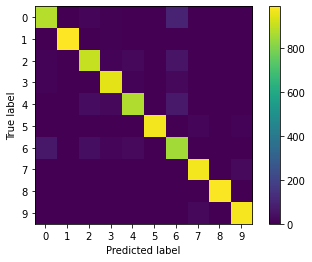

In [36]:
cm_dis.plot(include_values = False)

In [5]:
model2 = tf.keras.models.load_model('model.h5')

In [40]:
model2.evaluate(x_test, to_categorical(y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.1711 - accuracy: 0.9408


[0.17106123268604279, 0.9408000111579895]

Test Accuracy = 94%

In [4]:
import visualkeras

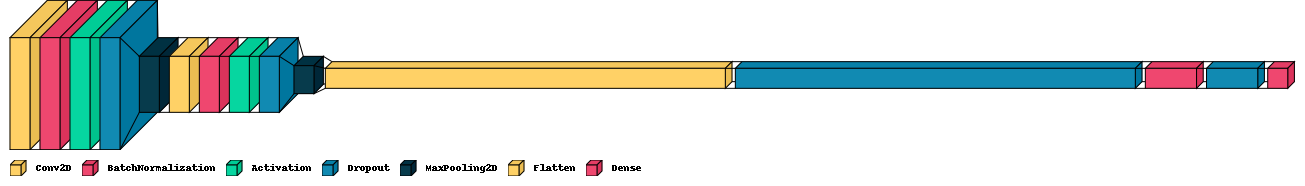

In [9]:
visualkeras.layered_view(model2, legend=True)